# Plot average zonal wind at a pressure level

In this notebook we will show you how to:

- Open data from the AUS2200 simulation post-processed output
- Slice the data at the required coordinates
- Create a quiver plot

### Load the libraries

In [32]:
import xarray as xr
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import cartopy.crs as ccrs

In [ ]:
# Let's load Dask to make Xarray more efficient
import dask.distributed as dsk

# Start client
clnt = dsk.Client()
clnt

## Load the Data

In [90]:
# The path to the data is here:
datadir = '/g/data/hh5/tmp/WACI-Hackathon-2023/AUS2200/data'

# Lets select the u and v wind for a specific time:
fname_u = 'u_plev_1hr_20220222.nc'
fname_v = 'v_plev_1hr_20220222.nc'

In [92]:
ds = xr.open_dataset(f'{datadir}/{fname_v}')
ds

<xarray.Dataset>
Dimensions:    (plev: 19, latitude: 2120, longitude: 2600, time: 24)
Coordinates:
  * plev       (plev) float32 100.0 500.0 1e+03 2e+03 ... 8.5e+04 9.25e+04 1e+05
  * latitude   (latitude) float32 -48.79 -48.77 -48.75 ... -6.871 -6.852 -6.832
  * longitude  (longitude) float32 107.5 107.5 107.6 107.6 ... 158.9 159.0 159.0
  * time       (time) datetime64[ns] 2022-02-22T01:00:00 ... 2022-02-23
Data variables:
    v          (time, plev, latitude, longitude) float32 ...
Attributes: (12/27)
    NCO:                  netCDF Operators version 5.0.5 (Homepage = http://n...
    Conventions:          CF-1.6, ACDD-1.3
    title:                AUS2200 UM amip simulation over Australian region f...
    summary:              A limited area model study of the entire Australian...
    source:               UM v12.2 ECMWF ERA5 forecast fields used as forcings
    license:              http://creativecommons.org/licenses/by/4.0/
    ...                   ...
    time_coverage_end:    2022-03-07
    geospatial_lat_min:   -48.788
    geospatial_lat_max:   -6.831799
    geospatial_lon_min:   107.5101
    geospatial_lon_max:   0.0198
    history:              Tue Feb 14 15:12:43 2023: ncap2 -s plev(:)={ 100., ...

In [93]:
# Open the u wind file and select that variable
ds = xr.open_dataset(f'{datadir}/{fname_u}')
u_all = ds.u

lon = ds.longitude
lat = ds.latitude
levels = ds.plev

# Slice the data to select the long/lat region (east coast of Australia)
# Also slecting the pressure level and time
u = u_all.sel(longitude=slice(146,158), latitude=slice(-36,-24), plev=slice(1000,1001), time=('2022-02-22T01:00:00'))
longitude = lon.sel(longitude=slice(146,158))
latitude = lat.sel(latitude=slice(-36,-24))

# Open the v wind file and select that variable
ds = xr.open_dataset(f'{datadir}/{fname_v}')
v_all = ds.v

v = v_all.sel(longitude=slice(146,158), latitude=slice(-36,-24), plev=slice(1000,1001), time=('2022-02-22T01:00:00'))

v

<xarray.DataArray 'v' (plev: 1, latitude: 606, longitude: 606)>
[367236 values with dtype=float32]
Coordinates:
  * plev       (plev) float32 1e+03
  * latitude   (latitude) float32 -36.0 -35.98 -35.96 ... -24.06 -24.04 -24.02
  * longitude  (longitude) float32 146.0 146.0 146.1 146.1 ... 158.0 158.0 158.0
    time       datetime64[ns] 2022-02-22T01:00:00
Attributes:
    cell_methods:   time: mean
    units:          m s-1
    standard_name:  northward_wind

## Plotting

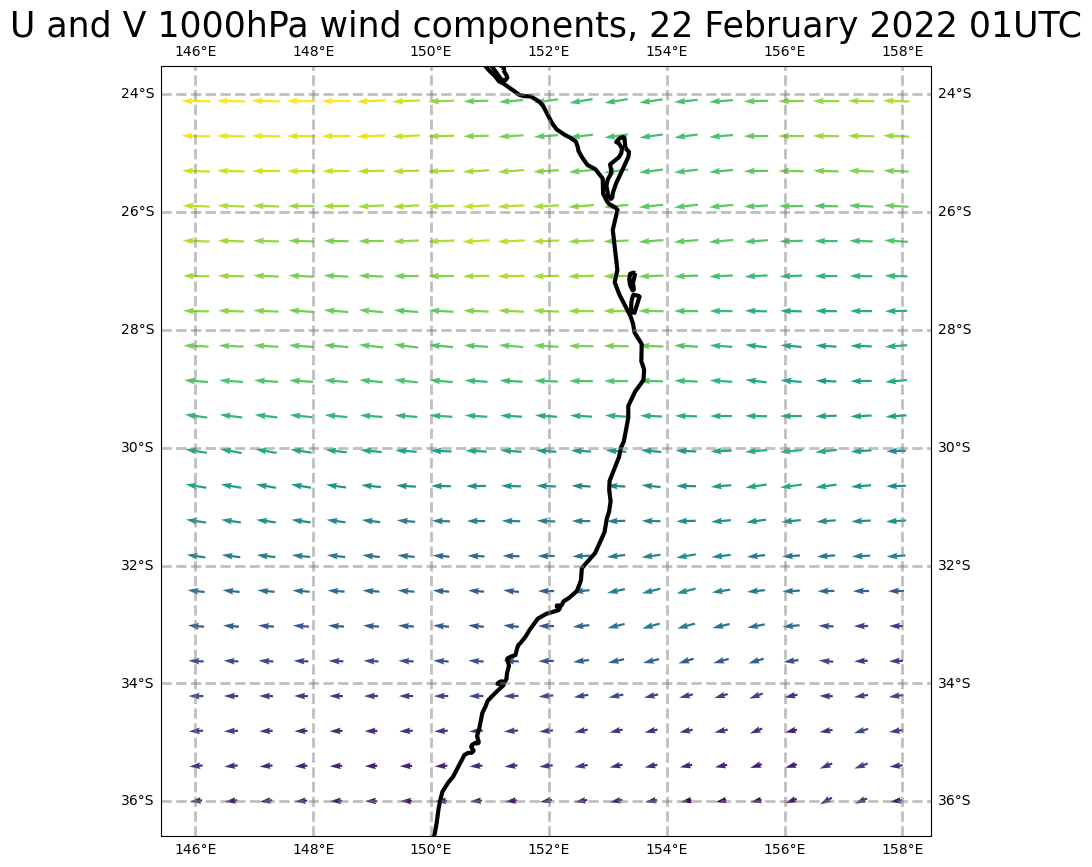

In [94]:
# Set up the figure and the projection type.
plt.figure(figsize=(10, 10))
src = ccrs.PlateCarree()
ax = plt.axes(projection=src)

# Create a variable that calculates the 'hypotenuse' of u and v
# We will use this ot colour our quivers
C = np.hypot(u.load(), v.load())

# Create a quiver plot
ax.quiver(longitude[::30], latitude[::30], np.squeeze(u)[::30, ::30], np.squeeze(v)[::30, ::30], np.squeeze(C)[::30, ::30], pivot='mid')

title = 'U and V 1000hPa wind components, 22 February 2022 01UTC'
plt.title(title, size=25)

# Add gridlines for long/lat and add coastlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
ax.coastlines('50m', linewidth=3)

In [30]:
#levels = np.arange(2,15,0.2)
#levels = np.arange(-20,20,2)
#cmap=matplotlib.cm.get_cmap('Spectral_r')
#ch = ax.contourf(longitude, latitude, np.sqrt(np.squeeze(v)**2 + np.squeeze(u)**2), levels=levels,colors='k')
#ax.clabel(ch, ch.levels, inline=True, fontsize=20)